In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate, KFold, GridSearchCV,StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, make_scorer, confusion_matrix,plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [32]:
import sklearn
print(sklearn.__version__)

1.0.2


In [33]:
df = pd.read_excel('https://github.com/SudiSana/Churn-dataset/raw/main/E_Commerce_Dataset.xlsx', sheet_name=1)
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [34]:
df2 = df.rename(columns={'CustomerID': 'Customer_ID', 'Churn': 'Churn_Flag', 'Tenure': 'Tenure_Time', 'PreferredLoginDevice': 'Login_Device', 'CityTier': 'Tier_City',
                        'WarehouseToHome': 'Dist_Warehouse_Home','PreferredPaymentMode': 'Payment_Mode', 'Gender': 'Gender', 'HourSpendOnApp': 'Hours_App',
                        'NumberOfDeviceRegistered': 'Registered_Devices', 'PreferedOrderCat': 'Order_Category','SatisfactionScore': 'SatisfactionScore','MaritalStatus': 'MaritalStatus',
                        'NumberOfAddress': 'Number_Address','Complain': 'Complain','OrderAmountHikeFromlastYear': 'Percentage_Increase_Last_Year', 'CouponUsed': 'Coupon_Used_LM',
                        'OrderCount': 'Order_Count', 'DaySinceLastOrder': 'Days_LO','CashbackAmount': 'Average_Cashback'})
df2.head()

,Customer_ID,Churn_Flag,Tenure_Time,Login_Device,Tier_City,Dist_Warehouse_Home,Payment_Mode,Gender,Hours_App,Registered_Devices,Order_Category,SatisfactionScore,MaritalStatus,Number_Address,Complain,Percentage_Increase_Last_Year,Coupon_Used_LM,Order_Count,Days_LO,Average_Cashback
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [35]:
def summary(text, df):
    print(f'{text} shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summ['null'] = df.isnull().sum()
    summ['unique'] = df.nunique()
    summ['min'] = df.min()
    summ['median'] = df.median()
    summ['max'] = df.max()
    summ['mean'] = df.mean()
    summ['std'] = df.std()
    return summ

In [36]:
duplicate_rows = df2.duplicated()

In [37]:
# Print duplicate rows
print("Duplicate Rows:")
print(df2[duplicate_rows])

Duplicate Rows:
Empty DataFrame
Columns: [Customer_ID, Churn_Flag, Tenure_Time, Login_Device, Tier_City, Dist_Warehouse_Home, Payment_Mode, Gender, Hours_App, Registered_Devices, Order_Category, SatisfactionScore, MaritalStatus, Number_Address, Complain, Percentage_Increase_Last_Year, Coupon_Used_LM, Order_Count, Days_LO, Average_Cashback]
Index: []


In [38]:
cats= ['Login_Device', 'Payment_Mode', 'Gender', 'Order_Category', 'MaritalStatus']
ordinal = ['Tier_City', 'SatisfactionScore']
binary = ['Churn_Flag', 'Complain']
nums = df2.loc[:, ~df2.columns.isin(cats + binary + ordinal)].columns[1:]
#df[cats].describe()

In [39]:
file_dict = {}

for col in cats:
    #fig, ax = plt.subplots(figsize=(8, 8))
    file_dict[col] = df2[col].value_counts().rename_axis(col).reset_index(name='Counts')


In [40]:
def churn_plot(x, data):
    df_cats = data.copy()
    df_city = df_cats.groupby(x)['Customer_ID'].nunique().reset_index(name='Total')
    df_churn =  df_cats.groupby([x, 'Churn_Flag'])['Customer_ID'].nunique().reset_index(name='TotalCustomer')
    df_merge = df_churn.merge(df_city, on=x)
    df_merge['Percentage'] = round(df_merge['TotalCustomer']/df_merge['Total']*100,2)
    df_merge = df_merge[df_merge['Churn_Flag'] == 1]
    return df_merge

In [41]:
# Perform MICE imputation
exception_columns = ['Customer_ID','Tier_City', 'Payment_Mode', 'Gender', 'Order_Category', 'MaritalStatus','Churn_Flag', 'Complain','SatisfactionScore']
df_numeric = df2.drop(columns=exception_columns)
df3=df2
!pip install fancyimpute
from fancyimpute import IterativeImputer
imputer = IterativeImputer()
df_imputed = imputer.fit_transform(df3[nums])
df_numeric_imputed = pd.DataFrame(df_imputed, columns=df3[nums].columns)
df3 = pd.concat([df_numeric_imputed, df3[exception_columns]], axis=1)


In [42]:
df3.columns

Index(['Tenure_Time', 'Dist_Warehouse_Home', 'Hours_App', 'Registered_Devices',
       'Number_Address', 'Percentage_Increase_Last_Year', 'Coupon_Used_LM',
       'Order_Count', 'Days_LO', 'Average_Cashback', 'Customer_ID',
       'Tier_City', 'Payment_Mode', 'Gender', 'Order_Category',
       'MaritalStatus', 'Churn_Flag', 'Complain', 'SatisfactionScore'],
      dtype='object')

In [43]:
df3[nums].columns

Index(['Tenure_Time', 'Dist_Warehouse_Home', 'Hours_App', 'Registered_Devices',
       'Number_Address', 'Percentage_Increase_Last_Year', 'Coupon_Used_LM',
       'Order_Count', 'Days_LO', 'Average_Cashback'],
      dtype='object')

In [44]:
###### Remove outliers 
print(f'before: {len(df3)}')

filtered_entries = np.array([True] * len(df3))

for col in nums:
    zscore = abs(stats.zscore(df3[col]))
    filtered_entries = (zscore < 3) & filtered_entries

df4 = df3[filtered_entries]

print(f'after: {len(df4)}')

before: 5630
after: 5350


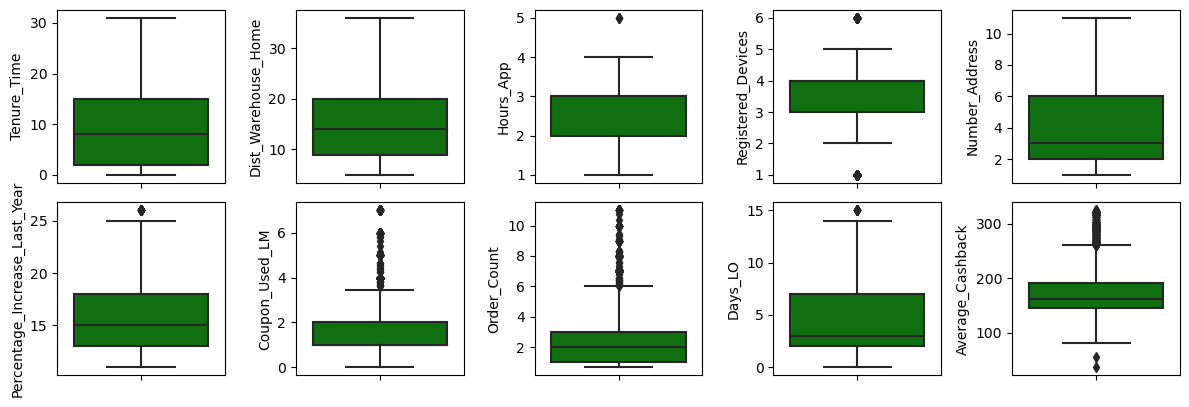

In [45]:
###### Check if outliers are removed
plt.figure(figsize=(12,4))
for i in range(0, len(nums)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df4[nums[i]], color='green')
    plt.tight_layout()

In [46]:
###### Categorical Variables Transformation
#df4['Login_Device'] = df4['Login_Device'].replace(['Phone','Mobile Phone'], ['Handphone', 'Handphone'])
df4['Payment_Mode'] = df4['Payment_Mode'].replace(['CC','COD'], ['Credit Card','Cash on Delivery'])
df4['Order_Category'] = df4['Order_Category'].replace(['Mobile','Mobile Phone', 'Laptop & Accessory'], ['Electronics', 'Electronics', 'Electronics'])


In [47]:
df4 = pd.get_dummies(df4)
df4.head()

,Tenure_Time,Dist_Warehouse_Home,Hours_App,Registered_Devices,Number_Address,Percentage_Increase_Last_Year,Coupon_Used_LM,Order_Count,Days_LO,Average_Cashback,Customer_ID,Tier_City,Churn_Flag,Complain,SatisfactionScore,Payment_Mode_Cash on Delivery,Payment_Mode_Credit Card,Payment_Mode_Debit Card,Payment_Mode_E wallet,Payment_Mode_UPI,Gender_Female,Gender_Male,Order_Category_Electronics,Order_Category_Fashion,Order_Category_Grocery,Order_Category_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,4.000000,6.0,3.000000,3.0,9.0,11.0,1.0,1.0,5.0,159.93,50001,3,1,1,2,0,0,1,0,0,1,0,1,0,0,0,0,0,1
1,6.454469,8.0,3.000000,4.0,7.0,15.0,0.0,1.0,0.0,120.90,50002,1,1,1,3,0,0,0,0,1,0,1,1,0,0,0,0,0,1
2,6.711164,30.0,2.000000,4.0,6.0,14.0,0.0,1.0,3.0,120.28,50003,1,1,1,3,0,0,1,0,0,0,1,1,0,0,0,0,0,1
3,0.000000,15.0,2.000000,4.0,8.0,23.0,0.0,1.0,3.0,134.07,50004,3,1,0,5,0,0,1,0,0,0,1,1,0,0,0,0,0,1
4,0.000000,12.0,2.645239,3.0,3.0,11.0,1.0,1.0,3.0,129.60,50005,1,1,0,5,0,1,0,0,0,0,1,1,0,0,0,0,0,1


In [48]:
###### Feature Engineering
df4['AvgTimeSpent'] = df4['Hours_App'] / df4['Registered_Devices']


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
column = ['Tenure_Time', 'Tier_City', 'Dist_Warehouse_Home', 'Hours_App', 'Registered_Devices', 
          'SatisfactionScore', 'Number_Address', 'Percentage_Increase_Last_Year', 'Coupon_Used_LM', 
          'Order_Count', 'Days_LO',  'Average_Cashback']
for col in column:
    df4[col] = StandardScaler().fit_transform(df4[col].values.reshape(len(df4),1))

In [51]:
column = []
for col in df4.columns:
    if (abs(df4['Churn_Flag'].corr(df4[col])) > 0.05):
        column.append(col)
df_final = df4[column]
df_final.sample(3)

,Tenure_Time,Dist_Warehouse_Home,Registered_Devices,Days_LO,Average_Cashback,Tier_City,Churn_Flag,Complain,SatisfactionScore,Payment_Mode_Cash on Delivery,Payment_Mode_E wallet,Order_Category_Electronics,Order_Category_Grocery,Order_Category_Others,MaritalStatus_Married,MaritalStatus_Single,AvgTimeSpent
933,-1.16546,1.784459,0.316639,1.721025,-0.614494,1.474493,1,1,0.684391,0,0,1,0,0,0,1,0.500000
1453,-1.16546,-0.325201,0.316639,-1.020358,-0.982033,-0.714335,0,0,-1.491615,0,0,1,0,0,1,0,0.673449
52,-1.16546,-0.945689,0.316639,-1.324956,-1.366121,-0.714335,1,0,-0.766279,0,0,1,0,0,0,1,0.500000


In [52]:
#Train Test Split Data
X = df_final.drop('Churn_Flag', axis=1)
y = df_final['Churn_Flag']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [54]:
#Handle Class Imbalance
print(X_train.shape)
print(y_train.shape)
print(y_train.value_counts())

(4280, 16)
(4280,)
0    3526
1     754
Name: Churn_Flag, dtype: int64


In [55]:
def evaluation(model_str, y_pred, y_pred_train):
    results = {
        'model': model_str,
        'acc test' : accuracy_score(y_test, y_pred),
        'acc train': accuracy_score(y_train, y_pred_train),
        'prec test' : precision_score(y_test, y_pred),
        'prec train' : precision_score(y_train, y_pred_train),
        'rec test' : recall_score(y_test, y_pred),
        'rec train' : recall_score(y_train, y_pred_train),
        'f2 test': fbeta_score(y_test, y_pred, pos_label=0,  beta=2),
        'f2 train': fbeta_score(y_train, y_pred_train, pos_label=0,  beta=2)
    }
    return results

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:

decision_pipe = make_pipeline(RandomOverSampler(sampling_strategy='minority'), DecisionTreeClassifier())
#CatBoost_GBM_pipe = make_pipeline(RandomOverSampler(sampling_strategy='minority'), CatBoostClassifier(verbose=False))
XGBoost_GBM_pipe = make_pipeline(RandomOverSampler(sampling_strategy='minority'), XGBClassifier())
 

In [58]:
scoring = {
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score),
    'accuracy': make_scorer(accuracy_score)
}

In [80]:
cat_param_grid = {
    'catboostclassifier__n_estimators': [100, 500, 1000],
    'catboostclassifier__learning_rate': [0.01, 0.1, 1],
    'catboostclassifier__max_depth': [2, 4, 6, 8, 10],
    'catboostclassifier__l2_leaf_reg': [0, 0.1, 1, 10]
}


decision_param_grid = {
    'decisiontreeclassifier__max_depth': [3, 5, 7],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
    'decisiontreeclassifier__ccp_alpha': [0.1, 0.5, 1]
}

#xgb_param_grid = {
 #   'xgbclassifier__n_estimators': [100, 500, 1000],
  #  'xgbclassifier__learning_rate': [0.01, 0.1, 1],
   # 'xgbclassifier__max_depth': [2, 4, 6, 8, 10],
    #'xgbclassifier__reg_alpha': [0, 0.001, 0.01, 0.1, 1],
    #'xgbclassifier__reg_lambda': [0, 0.001, 0.01, 0.1, 1],
#}


xgb_param_grid = {
    'xgbclassifier__reg_alpha': [0, 0.001, 0.01, 0.1, 1],
    'xgbclassifier__reg_lambda': [0, 0.001, 0.01, 0.1, 1],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.3],
    'xgbclassifier__max_depth': [3, 5]
}

In [81]:
#models = [
 #   ('Decision_Tree',decision_pipe, decision_param_grid),
  #  ('XgBoost',XGBoost_GBM_pipe,xgb_param_grid)
  
#]

In [82]:
models = [('XgBoost',XGBoost_GBM_pipe,xgb_param_grid)]


One
Best hyperparameters: Pipeline(steps=[('randomoversampler',
                 RandomOverSampler(sampling_strategy='minority')),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, miss

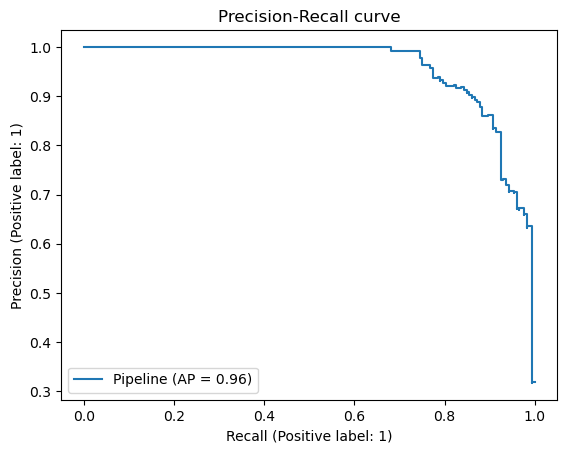

Three


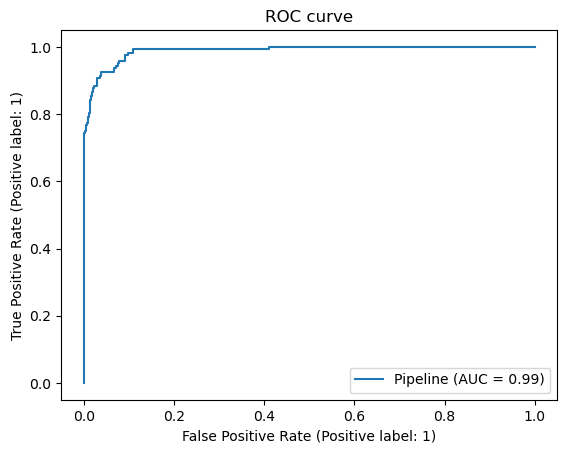

[[871  27]
 [ 16 156]]


In [84]:
# Define the cross-validation strategy
for model_name,model,param_grid in models:
    print("One")
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid = GridSearchCV(model, param_grid=param_grid, cv=5, scoring=scoring, refit='roc_auc')
    grid.fit(X_train, y_train)
    best_estimator = grid.best_estimator_
    best_estimator.fit(X_train, y_train)
    print('Best hyperparameters:', best_estimator)
    results = grid.cv_results_
    y_pred = best_estimator.predict(X_test)
    print("Two")
    for scorer in scoring:
        print("Best parameter for %s: %s" % (scorer, grid.best_params_))
        print("Best %s: %f" % (scorer, grid.best_score_))
        print("Mean %s: %f (std: %f)" % (scorer, results['mean_test_%s' % scorer][grid.best_index_], results['std_test_%s' % scorer][grid.best_index_]))
        print()
    cv_results = grid.cv_results_
    for metric_name in scoring:
        print("{}: {:.3f}".format(metric_name, cv_results["mean_test_{}".format(metric_name)][grid.best_index_]))
        # Plot the PR ROC curve for the testing data
    disp = plot_precision_recall_curve(best_estimator, X_test, y_test)
    disp.ax_.set_title('Precision-Recall curve')
    plt.show()
    print("Three")
    disp = plot_roc_curve(best_estimator, X_test, y_test)
    disp.ax_.set_title('ROC curve')
    plt.show()
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

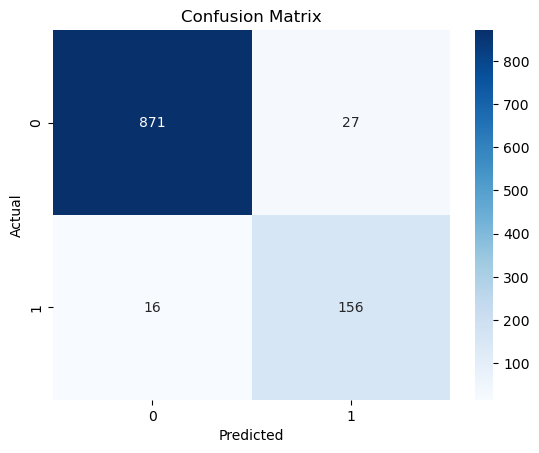

In [91]:
# Create a heatmap using Seaborn
sns.heatmap(cm, annot=True, cmap="Blues",fmt=".0f")

# Add labels and title
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

# Show the plot
plt.show()


In [90]:
cm

array([[871,  27],
       [ 16, 156]], dtype=int64)